In [9]:
# Model Training for Sentiment Analysis
# Trains a Logistic Regression model on sentiment-labeled data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [10]:
# Load sentiment-labeled data
df = pd.read_csv("../outputs/tokopedia_sentiments.csv") 
print(df.head())

                                              review  \
0  Laptop tergolong ringan,tidak terlalu besar......   
1  pengiriman cepat, spek barang sesuai, packing ...   
2        manntab respon cepet barang ok dan original   
3  Barang cepat sampai dan sesuai informasi, Admi...   
4  spek sesuai deskripsi, pengiriman gercep, sell...   

                                      cleaned_review sentiment_nb  \
0  laptop tergolong ringan tidak terlalu besar ma...     negative   
1   pengiriman cepat spek barang sesuai packing aman     positive   
2        manntab respon cepet barang ok dan original      neutral   
3  barang cepat sampai dan sesuai informasi admin...      neutral   
4  spek sesuai deskripsi pengiriman gercep seller...     negative   

  sentiment_nn sentiment_final  confidence  
0     positive        positive    0.680371  
1     positive        positive    0.667202  
2      neutral         neutral    0.649360  
3     negative        negative    0.609240  
4     negative        n

In [11]:
# Prepare features and target
X = df['cleaned_review']
y = df['sentiment_final']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create ML pipeline with TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('lr', LogisticRegression(max_iter=1000))
])

In [13]:
# Train the model on training data
pipeline.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [14]:
# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.47368421052631576

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         9
    positive       0.50      1.00      0.67         9

    accuracy                           0.47        19
   macro avg       0.17      0.33      0.22        19
weighted avg       0.24      0.47      0.32        19



d:\My Stuff\Kuliah\Semester 5\Web App\data-crawling\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\My Stuff\Kuliah\Semester 5\Web App\data-crawling\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\My Stuff\Kuliah\Semester 5\Web App\data-crawling\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

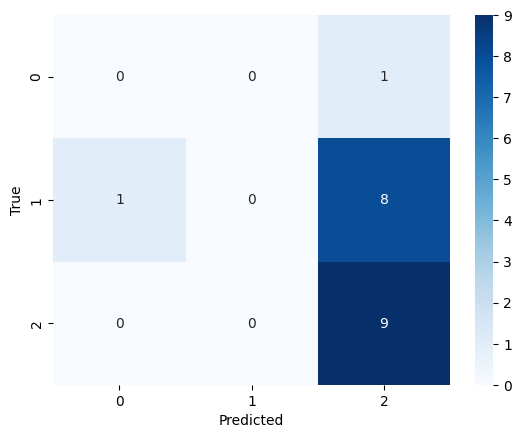

In [15]:
# Visualize model performance with confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# Save trained model for future use
joblib.dump(pipeline, '../models/model_lr.joblib')
print("Model saved as model_lr.joblib")

Model saved as model_lr.joblib
